Hasil Perhitungan Matriks Keanggotaan:
[ Iterasi 1 ]
Baris 1 :
   - Membership Klaster 1 : 0.333333895172486
   - Membership Klaster 2 : 0.3333346956814159
   - Membership Klaster 3 : 0.33333140914609805
Baris 2 :
   - Membership Klaster 1 : 0.3333344576578483
   - Membership Klaster 2 : 0.33333605674439354
   - Membership Klaster 3 : 0.3333294855977581
Baris 3 :
   - Membership Klaster 1 : 0.3333344574452751
   - Membership Klaster 2 : 0.33333605753675755
   - Membership Klaster 3 : 0.33332948501796733
Baris 4 :
   - Membership Klaster 1 : 0.33333520718178467
   - Membership Klaster 2 : 0.33333787332163606
   - Membership Klaster 3 : 0.3333269194965792
Baris 5 :
   - Membership Klaster 1 : 0.3333338952725041
   - Membership Klaster 2 : 0.333334695291123
   - Membership Klaster 3 : 0.33333140943637285
Baris 6 :
   - Membership Klaster 1 : 0.3333361464303917
   - Membership Klaster 2 : 0.3333401401084816
   - Membership Klaster 3 : 0.3333237134611266
Baris 7 :
   - Membership Klaster 1 

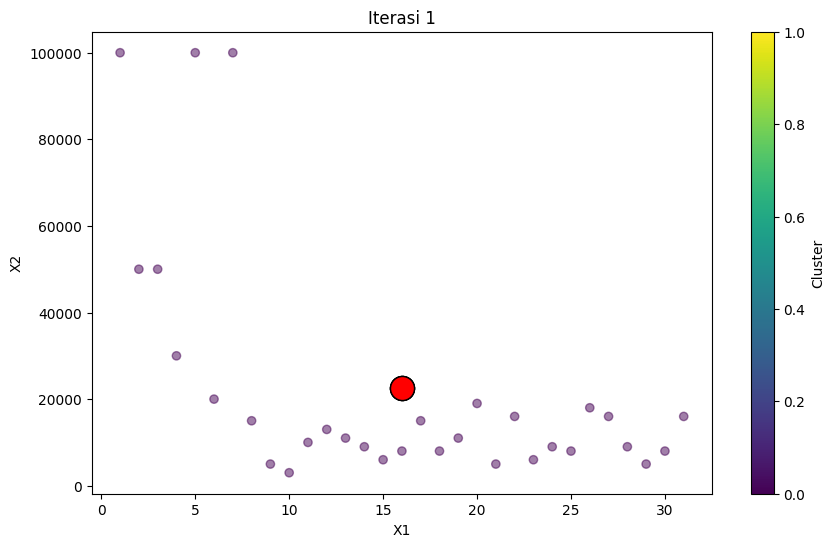

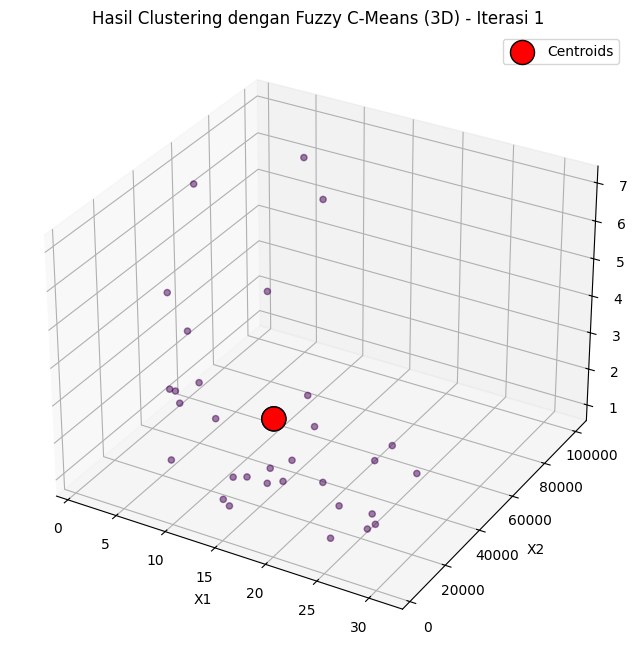

Hasil Perhitungan Matriks Keanggotaan:
[ Iterasi 2 ]
Baris 1 :
   - Membership Klaster 1 : 0.3333297996237092
   - Membership Klaster 2 : 0.3333248644862515
   - Membership Klaster 3 : 0.33334533589003934
Baris 2 :
   - Membership Klaster 1 : 0.3333233626391004
   - Membership Klaster 2 : 0.33330943939630203
   - Membership Klaster 3 : 0.3333671979645976
Baris 3 :
   - Membership Klaster 1 : 0.33332336263852524
   - Membership Klaster 2 : 0.33330943939492363
   - Membership Klaster 3 : 0.3333671979665511
Baris 4 :
   - Membership Klaster 1 : 0.3332965902934264
   - Membership Klaster 2 : 0.33324530792186297
   - Membership Klaster 3 : 0.33345810178471064
Baris 5 :
   - Membership Klaster 1 : 0.33332979962367354
   - Membership Klaster 2 : 0.3333248644861659
   - Membership Klaster 3 : 0.3333453358901606
Baris 6 :
   - Membership Klaster 1 : 0.33344059279479593
   - Membership Klaster 2 : 0.33359070793306994
   - Membership Klaster 3 : 0.3329686992721341
Baris 7 :
   - Membership Klaste

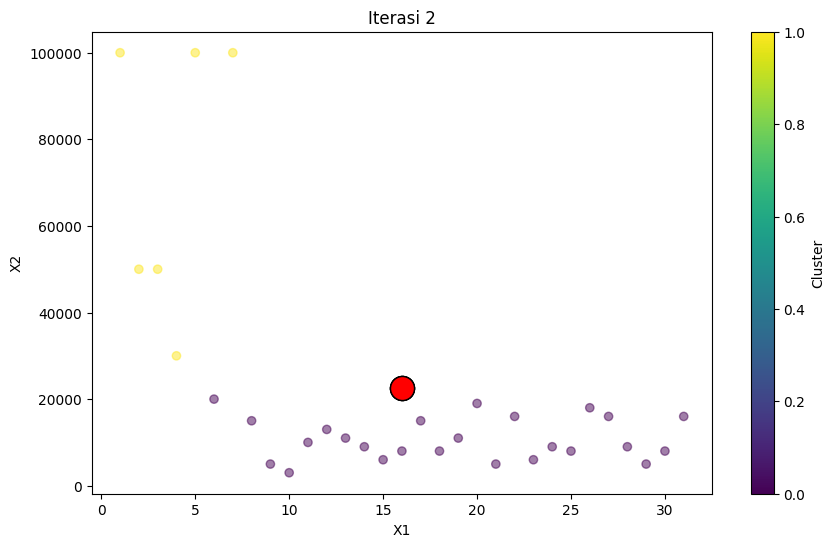

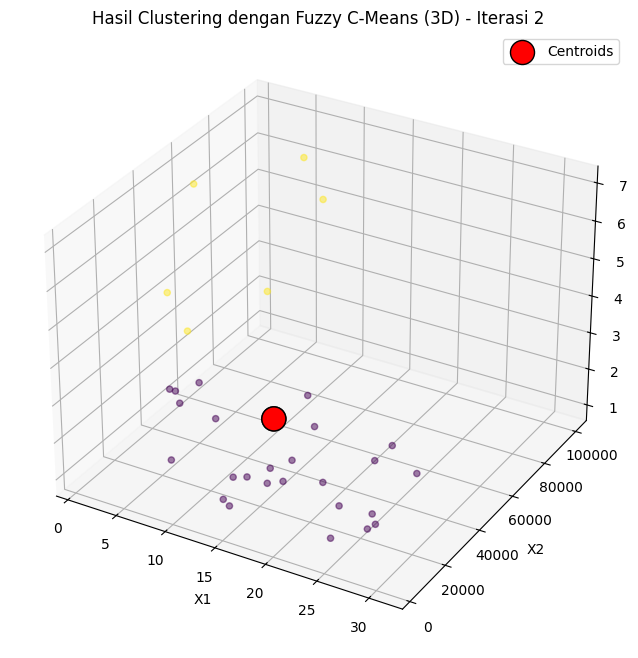

Hasil Perhitungan Matriks Keanggotaan:
[ Iterasi 3 ]
Baris 1 :
   - Membership Klaster 1 : 0.3333191931236748
   - Membership Klaster 2 : 0.33329945762091084
   - Membership Klaster 3 : 0.3333813492554144
Baris 2 :
   - Membership Klaster 1 : 0.3332934265746919
   - Membership Klaster 2 : 0.3332377560579073
   - Membership Klaster 3 : 0.33346881736740086
Baris 3 :
   - Membership Klaster 1 : 0.3332934265719483
   - Membership Klaster 2 : 0.3332377560513399
   - Membership Klaster 3 : 0.33346881737671186
Baris 4 :
   - Membership Klaster 1 : 0.3331861376114439
   - Membership Klaster 2 : 0.3329812166546828
   - Membership Klaster 3 : 0.3338326457338734
Baris 5 :
   - Membership Klaster 1 : 0.33331919312364744
   - Membership Klaster 2 : 0.33329945762084523
   - Membership Klaster 3 : 0.3333813492555074
Baris 6 :
   - Membership Klaster 1 : 0.33376089555501137
   - Membership Klaster 2 : 0.3343627278334843
   - Membership Klaster 3 : 0.33187637661150443
Baris 7 :
   - Membership Klaster 

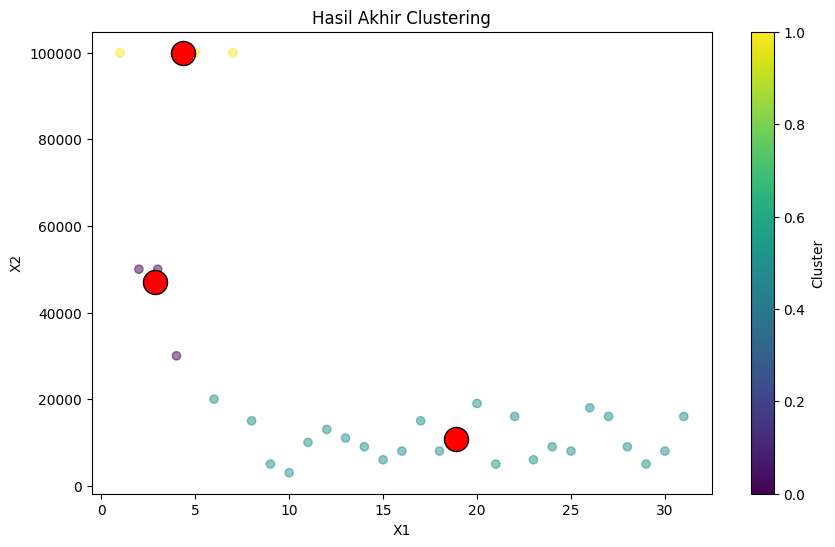

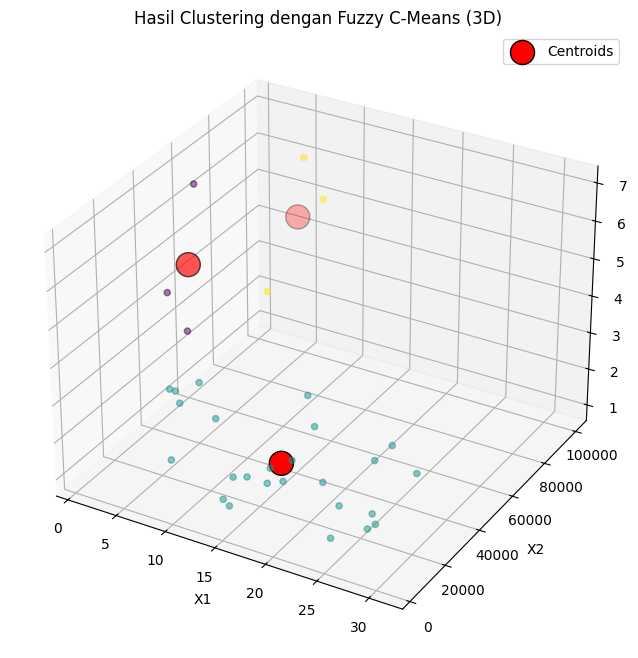

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data from URL
url = "https://github.com/nendynailula/fuzzy-cmeans/blob/main/Credit%20Card%20Customer%20Data.csv?raw=true"
df = pd.read_csv(url)

# Menghilangkan kolom Customer_ID karena tidak diperlukan untuk clustering
data = df.drop('Customer Key', axis=1).values

# Fuzzy C-Means Algorithm
def fuzzy_cmeans(data, num_clusters, fuzziness=2, max_iter=100, error=1e-6):
    samples = data.shape[0]
    features = data.shape[1]
    cluster_centers = np.random.rand(num_clusters, features)
    
    # Iterasi
    for iter in range(max_iter):
        # Hitung matriks keanggotaan
        distances = np.linalg.norm(data[:, np.newaxis, :] - cluster_centers, axis=2)
        membership_mat = np.zeros((len(data), num_clusters))
        for i in range(samples):
            for j in range(num_clusters):
                membership_mat[i, j] = 1 / sum((distances[i, j] / np.linalg.norm(data[i] - cluster_centers[k])) ** (2 / (fuzziness - 1)) for k in range(num_clusters))

        # Perbarui centroid
        cluster_centers_old = cluster_centers.copy()
        for j in range(num_clusters):
            numerator = sum((membership_mat[i, j] ** fuzziness) * data[i] for i in range(len(data)))
            denominator = sum(membership_mat[i, j] ** fuzziness for i in range(len(data)))
            cluster_centers[j] = numerator / denominator.astype(float)  # Konversi ke float


        # Tampilkan hasil perhitungan matriks keanggotaan
        print("Hasil Perhitungan Matriks Keanggotaan:")
        print("[ Iterasi", iter+1, "]")
        for i in range(len(data)):
            print("Baris", i+1, ":")
            for j in range(num_clusters):
                print("   - Membership Klaster", j+1, ":", membership_mat[i, j])

        # Tampilkan hasil perbaruan centroid
        print("\nHasil Perbaruan Centroid:")
        for j in range(num_clusters):
            print("Centroid", j+1, ":", cluster_centers[j])

        # Cetak hasil clustering dan plot pada iterasi pertama dan kedua
        if iter == 0 or iter == 1:
            cluster_membership = membership_mat.argmax(axis=1)
            plt.figure(figsize=(10, 6))
            plt.scatter(data[:, 0], data[:, 1], c=cluster_membership, cmap='viridis', alpha=0.5)
            plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', s=300, c='red', edgecolor='k')
            plt.title('Iterasi {}'.format(iter+1))
            plt.xlabel('X1')
            plt.ylabel('X2')
            plt.colorbar(label='Cluster')
            plt.show()
        # Plot 3D untuk iterasi 1 dan 2
        if iter == 0 or iter == 1:
            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=cluster_membership, cmap='viridis', alpha=0.5)
            ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='o', s=300, c='red', edgecolor='k', label='Centroids')
            ax.set_title('Hasil Clustering dengan Fuzzy C-Means (3D) - Iterasi {}'.format(iter+1))
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
            ax.set_zlabel('X3')
            ax.legend()
            plt.show()
        # Cek konvergensi
        if np.linalg.norm(cluster_centers - cluster_centers_old) < error:
            break
    
    return cluster_centers, membership_mat

# Menentukan jumlah klaster dan nilai fuzziness
num_clusters = 3
fuzziness = 2

# Menjalankan algoritma Fuzzy C-Means
centroids, membership = fuzzy_cmeans(data, num_clusters, fuzziness)

# Plot hasil akhir
cluster_membership = membership.argmax(axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=cluster_membership, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=300, c='red', edgecolor='k')
plt.title('Hasil Akhir Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Cluster')
plt.show()

# Plot 3D hasil clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=cluster_membership, cmap='viridis', alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='o', s=300, c='red', edgecolor='k', label='Centroids')
ax.set_title('Hasil Clustering dengan Fuzzy C-Means (3D)')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend()
plt.show()